# IMPORT LIBS - SET PATH - SET CLASSES


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from pathlib import Path
from fastai import *
from copy import deepcopy
import torch
import fastbook
from fastbook import *
from io import FileIO
import sys
import os 

In [4]:
torch.cuda.is_available()

True

In [5]:
PATH = 'C:/Users/asims/Desktop/HAR Project/Dataset'
bs = 64
model_id = 'model-1'
tfms = []
size = 432

In [15]:
def load_images():
    p = Path(PATH)
    files = []
    classes = []
    for subdir in p.ls():
        for fn in subdir.glob('*.png'):
            files.append(fn)
            classes.append(subdir.name)

    return ImageDataBunch.from_lists(PATH, files, classes, ds_tfms=tfms, bs=bs, size=size)

data = load_images()

NameError: name 'ImageDataBunch' is not defined

In [10]:
data.show_batch(rows=2, figsize=(15, 15))

AttributeError: 'ImageDataBunch' object has no attribute 'show_batch'

# TRAIN MODEL

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

AttributeError: 'ImageDataBunch' object has no attribute 'after_batch'

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


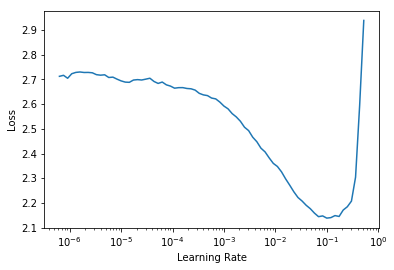

In [8]:
learn.lr_find()
learn.recorder.plot()

# TRAIN FINAL LAYER


In [8]:
learn.fit_one_cycle(6, 2e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.624156,1.992367,0.695000,0.305000,01:15
1,1.120536,0.982526,0.353333,0.646667,01:14
2,0.792679,0.652638,0.221667,0.778333,01:14
3,0.598426,1.057714,0.331667,0.668333,01:15
4,0.527328,1.019684,0.248333,0.751667,01:13
5,0.447465,0.582644,0.171667,0.828333,01:13
6,0.414731,4.543187,0.611667,0.388333,01:14
7,0.351221,0.790390,0.240000,0.760000,01:13
8,0.337760,1.284791,0.278333,0.721667,01:14
9,0.318334,0.749973,0.213333,0.786667,01:12


In [10]:
learn.save(f'{model_id}-stage-1')

# TRAIN MODEL

In [11]:
learn.load(f'{model_id}-stage-1')
learn.unfreeze()

In [12]:
learn.fit_one_cycle(8, slice(1e-5, 1e-4))

Total time: 03:45
epoch  train_loss  valid_loss  error_rate
1      0.095226    0.220977    0.077764    (00:28)
2      0.079613    0.210287    0.064399    (00:27)
3      0.065561    0.227906    0.069259    (00:28)
4      0.044867    0.221628    0.068044    (00:28)
5      0.030210    0.209533    0.065614    (00:28)
6      0.022746    0.191124    0.059538    (00:28)
7      0.015487    0.183024    0.054678    (00:28)
8      0.012392    0.180203    0.053463    (00:28)



In [13]:
learn.save(f'{model_id}-stage-2')

# TRAIN FINAL LAYER AGAIN

In [14]:
learn.load(f'{model_id}-stage-2')
learn.freeze()

In [15]:
learn.fit_one_cycle(5, max_lr=1e-3)

Total time: 01:47
epoch  train_loss  valid_loss  error_rate
1      0.008691    0.181922    0.054678    (00:21)
2      0.007463    0.239170    0.071689    (00:21)
3      0.006695    0.212577    0.055893    (00:21)
4      0.005829    0.204746    0.057108    (00:21)
5      0.004298    0.201159    0.051033    (00:21)



In [16]:
learn.save(f'{model_id}-stage-3')

# RESULTS

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

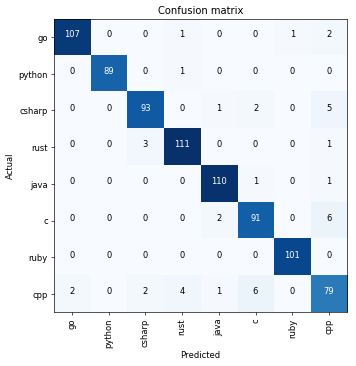

In [18]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

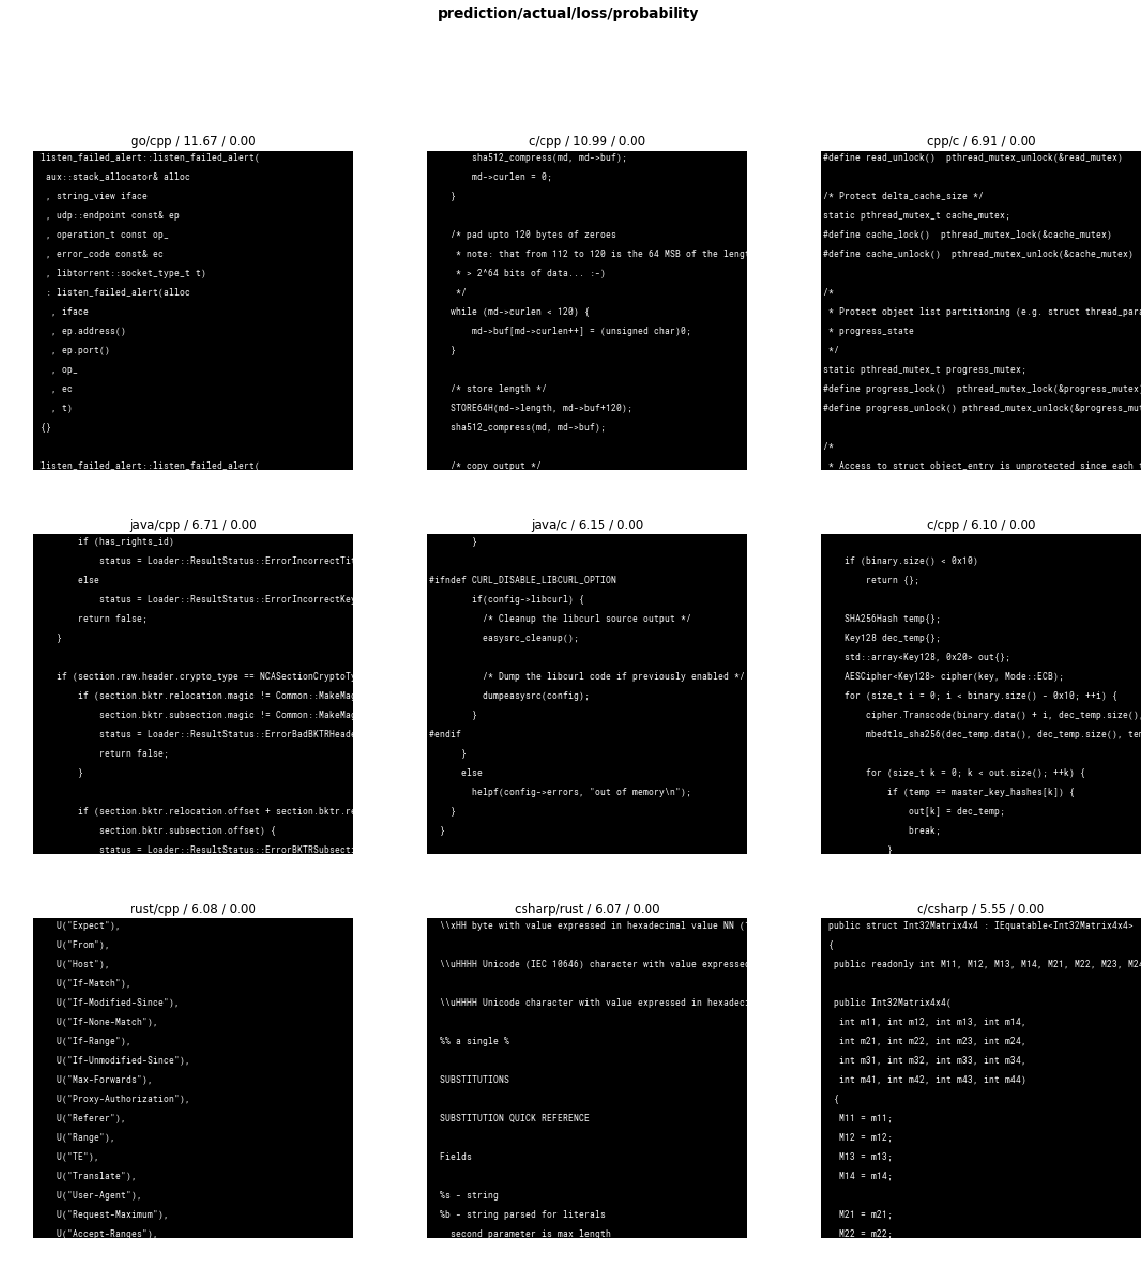

In [19]:
interp.plot_top_losses(9, figsize=(20,20))

In [20]:
interp.most_confused()

[('c', 'cpp', 6),
 ('cpp', 'c', 6),
 ('csharp', 'cpp', 5),
 ('cpp', 'rust', 4),
 ('rust', 'csharp', 3),
 ('go', 'cpp', 2),
 ('csharp', 'c', 2),
 ('c', 'java', 2),
 ('cpp', 'go', 2),
 ('cpp', 'csharp', 2)]